In [ ]:
import pandas as pd
import numpy as np
import random


def random_kill(n):
    # 生成一个随机的奇数，范围从0到n-1
    return random.choice([i for i in range(n) if i % 2 == 0])


def random_kill_list(alive_ids):
    n = len(alive_ids)
    return alive_ids[random_kill(n)]


print(random_kill(1))
num_people = 600
df = pd.DataFrame({"id": range(1, 1 + num_people), "status": [1] * num_people})
df_alive = df[df['status'] == 1]

df['killed_turn'] = -1
kill_id = random_kill(len(df))
kill_sequence = []

for turn in range(num_people)[:]:
    df_alive = df[df['status'] == 1]
    alive_ids = df_alive['id'].to_list()
    kill_id = random_kill_list(alive_ids) - 1

    df.loc[kill_id, 'status'] = 0
    # print(len(df_alive))
    kill_sequence.append(kill_id + 1)

    df.loc[kill_id, 'killed_turn'] = turn + 1

if df['status'].sum() == 0:
    print("All people killed.")
else:
    print("Failed")

# print(kill_sequence)

print("The winner is id:",
      df.sort_values(by='killed_turn', ascending=False).iloc[0]['id'])
df.sort_values(by='killed_turn', ascending=False)

In [ ]:
import pandas as pd
import random


def run_simulation(num_people):

    def random_kill(n):
        # 生成一个随机的奇数，范围从0到n-1
        return random.choice([i for i in range(n) if i % 2 == 0])

    def random_kill_list(alive_ids):
        n = len(alive_ids)
        return alive_ids[random_kill(n)]

    df = pd.DataFrame({
        "id": range(1, 1 + num_people),
        "status": [1] * num_people
    })
    df['killed_turn'] = -1

    kill_sequence = []

    for turn in range(num_people):
        df_alive = df[df['status'] == 1]
        alive_ids = df_alive['id'].to_list()
        kill_id = random_kill_list(alive_ids) - 1

        df.loc[kill_id, 'status'] = 0
        kill_sequence.append(kill_id + 1)

        df.loc[kill_id, 'killed_turn'] = turn + 1

    # if df['status'].sum() == 0:
    #     print("All people killed.")
    # else:
    #     print("Failed")

    # print("The winner is id:",
    #       df.sort_values(by='killed_turn', ascending=False).iloc[0]['id'])

    return df


# 运行并返回结果
result_df = run_simulation(600)
result_df


In [124]:
import pandas as pd
import numpy as np
import random


def random_kill(n):
    # 生成一个随机的奇数，范围从0到n-1
    return random.choice([i for i in range(n) if i % 2 == 0])


def random_kill_list(alive_ids):
    n = len(alive_ids)
    return alive_ids[random_kill(n)]


def run_simulation_numpy(num_people):

    # 初始化 NumPy 数组
    ids = np.arange(1, num_people + 1)
    status = np.ones(num_people, dtype=int)  # 1表示存活
    killed_turn = np.full(num_people, -1)  # 初始化淘汰回合

    for turn in range(num_people):
        alive_ids = ids[status == 1]  # 获取当前存活的ID
        if len(alive_ids) == 0:  # 如果没有存活者，提前退出循环
            break

        kill_id = random_kill_list(alive_ids) - 1  # 选择要淘汰的ID

        status[kill_id] = 0  # 标记为淘汰
        killed_turn[kill_id] = turn + 1  # 记录淘汰回合

    # 转换为 DataFrame
    df = pd.DataFrame({
        "id": ids,
        "status": status,
        "killed_turn": killed_turn
    })

    return df.sort_values(by='killed_turn', ascending=False)


#


In [ ]:
# df_simul = pd.DataFrame({"id": range(1, 1 + num_people)})
# for i in range(10):
#     result_df = run_simulation(600)
#     df_simul[f'turn_{i}'] = result_df['killed_turn']

In [284]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

import tqdm
def random_kill(n):
    # 生成一个随机的奇数，范围从0到n-1
    return random.choice([i for i in range(n) if i % 2 == 0])


def random_kill_list(alive_ids):
    n = len(alive_ids)
    return alive_ids[random_kill(n)]


def run_simulation_numpy(num_people):

    # 初始化 NumPy 数组
    ids = np.arange(1, num_people + 1)
    status = np.ones(num_people, dtype=int)  # 1表示存活
    killed_turn = np.full(num_people, -1)  # 初始化淘汰回合

    for turn in range(num_people):
        alive_ids = ids[status == 1]  # 获取当前存活的ID
        if len(alive_ids) == 0:  # 如果没有存活者，提前退出循环
            break

        kill_id = random_kill_list(alive_ids) - 1  # 选择要淘汰的ID

        status[kill_id] = 0  # 标记为淘汰
        killed_turn[kill_id] = turn + 1  # 记录淘汰回合

    # 转换为 DataFrame
    df = pd.DataFrame({
        "id": ids,
        "status": status,
        "killed_turn": killed_turn
    })

    return df


#

df_simul = pd.DataFrame({"id": range(1, 1 + num_people)})
for i in range(100):
    result_df = run_simulation_numpy(100)
    df_simul[f'turn_{i}'] = result_df['killed_turn']

result_df

,id,status,killed_turn
0,1,0,284
1,2,0,379
2,3,0,51
3,4,0,434
4,5,0,500
...,...,...,...
595,596,0,237
596,597,0,556
597,598,0,362
598,599,0,21


In [285]:
df_simul

,id,turn_0,turn_1,turn_2,turn_3,turn_4,turn_5,turn_6,turn_7,turn_8,...,turn_9990,turn_9991,turn_9992,turn_9993,turn_9994,turn_9995,turn_9996,turn_9997,turn_9998,turn_9999
0,1,236,146,400,13,207,128,79,117,355,...,264,50,287,168,388,170,315,52,441,284
1,2,433,334,568,176,375,168,217,212,491,...,441,82,456,503,473,520,428,323,479,379
2,3,47,74,388,199,455,272,70,469,237,...,488,197,74,53,192,152,143,527,186,51
3,4,57,391,596,161,300,455,324,530,543,...,276,498,79,550,344,153,200,544,360,434
4,5,528,43,317,322,91,57,188,444,562,...,118,500,193,282,566,579,286,545,489,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,287,18,20,318,533,305,17,300,483,...,373,445,496,368,469,511,50,600,118,237
596,597,447,465,274,510,586,504,168,426,467,...,556,31,396,391,265,566,574,270,80,556
597,598,439,187,43,317,343,116,4,299,522,...,8,478,366,209,106,298,28,560,519,362
598,599,185,41,37,460,458,59,514,241,89,...,344,319,278,518,600,203,98,77,580,21


In [298]:
# 统计每个ID成为最后一个被淘汰的次数
last_killed = df_simul.iloc[:, 1:].idxmax()
last_killed_counts = {}
for i in range(1, len(df_simul )+1):
    last_killed_counts[i] = 0
# print(last_killed_counts.keys())
for i in df_simul.loc[df_simul.iloc[:, 1:].idxmax()]['id']:
    last_killed_counts[i] += 1

<AxesSubplot:xlabel='id'>

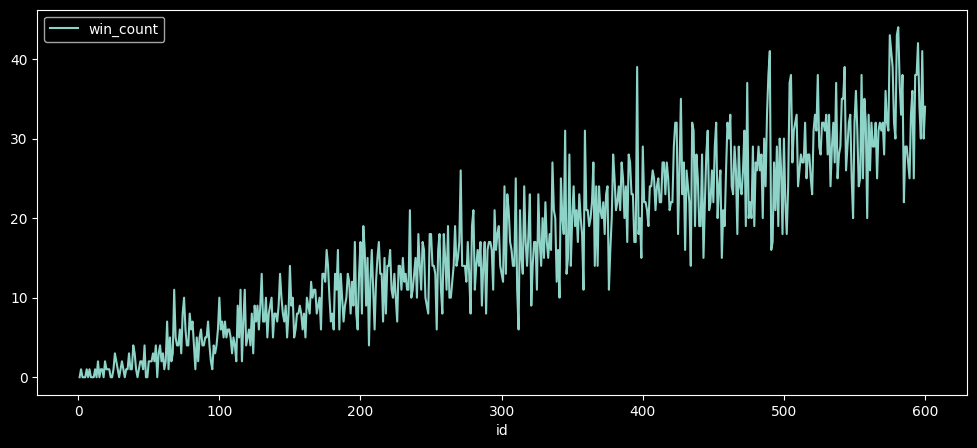

In [303]:
# 统计每个ID成为最后一个被淘汰的次数
last_killed = df_simul.iloc[:, 1:].idxmax()
last_killed_counts = {}
for i in range(1, len(df_simul )+1):
    last_killed_counts[i] = 0
# print(last_killed_counts.keys())
for i in df_simul.loc[df_simul.iloc[:, 1:].idxmax()]['id']:
    last_killed_counts[i] += 1
last_killed_counts = pd.DataFrame({
    'id': last_killed_counts.keys(),
    'win_count': last_killed_counts.values()
})

last_killed_counts.plot(x='id',y='win_count',figsize=(12,5))

In [289]:
# 统计每个ID成为最后一个被淘汰的次数
last_killed = df_simul.iloc[:, 1:].idxmax()
last_killed_counts = pd.DataFrame({
    'id': range(1,
                len(df_simul) + 1),
    'win_count': [0] * len(df_simul)
})

# print(last_killed)
# last_killed_counts = last_killed.value_counts()
for i in last_killed.values:
    last_killed_counts.loc[i, 'win_count'] = last_killed.value_counts()[i]

# print(last_killed_counts['win_count'].sum())

last_killed_counts['win_count']
last_killed_counts

,id,win_count
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
595,596,34
596,597,30
597,598,41
598,599,30


In [290]:
last_killed_counts.sort_values('win_count',ascending=False)

,id,win_count
580,581,44
579,580,43
574,575,43
594,595,42
575,576,41
...,...,...
47,48,0
48,49,0
55,56,0
1,2,0


In [291]:
df_simul['average_alive_turns'] = df_simul.T.mean()
df_simul[['id', 'average_alive_turns']].sort_values(by='average_alive_turns',
                                                    ascending=False)

,id,average_alive_turns
1,2,333.460554
3,4,324.603240
5,6,318.930407
11,12,313.358464
7,8,312.109689
...,...,...
12,13,285.549845
6,7,278.875812
4,5,270.934307
2,3,254.281072


<AxesSubplot:xlabel='id'>

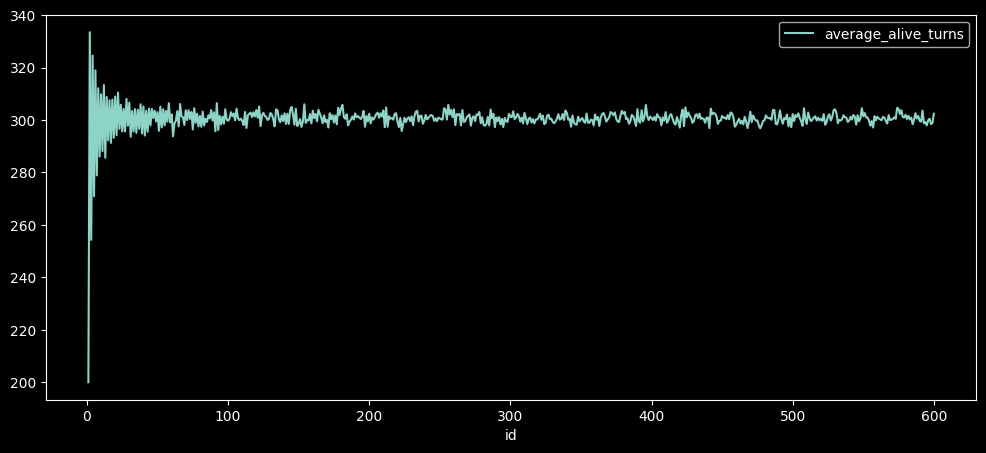

In [306]:
df_simul[['id', 'average_alive_turns']].plot(x='id',y='average_alive_turns',figsize=(12,5))